In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\claimants.csv")

In [3]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1096 non-null   int64  
 1   ATTORNEY  1096 non-null   int64  
 2   CLMSEX    1096 non-null   float64
 3   CLMINSUR  1096 non-null   float64
 4   SEATBELT  1096 non-null   float64
 5   CLMAGE    1096 non-null   float64
 6   LOSS      1096 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 68.5 KB


In [7]:
df.drop('CASENUM',axis=1,inplace=True)

In [8]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [9]:
target=df['ATTORNEY']

In [10]:
features=df.drop('ATTORNEY',axis=1)

In [11]:
target

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.75,random_state=100)

In [13]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(822, 5)
(274, 5)
(822,)
(274,)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logre=LogisticRegression()

In [16]:
model=logre.fit(xtrain,ytrain)

In [17]:
ypredt=model.predict(xtest)

In [18]:
ypredt.shape

(274,)

In [19]:
model.coef_

array([[ 0.45911973,  0.41945559, -0.70453012,  0.0065941 , -0.37713124]])

In [20]:
from sklearn.metrics import mean_squared_error,r2_score,f1_score,auc,precision_score,recall_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [21]:
mse=mean_squared_error

In [22]:
mse_model=mse(y_true=ytest,y_pred=ypredt)

In [23]:
mse_model

0.2956204379562044

In [24]:
rsquare=r2_score(y_true=ytest,y_pred=ypredt)

In [25]:
rsquare

-0.18760702054794542

In [26]:
accuracy_score(ytest,ypredt)

0.7043795620437956

In [27]:
recall_score(ytest,ypredt)

0.734375

In [28]:
precision_score(ytest,ypredt)

0.6666666666666666

In [29]:
f1_score(ytest,ypredt)

0.6988847583643123

In [30]:
conf=confusion_matrix(ytest,ypredt)

In [31]:
conf

array([[99, 47],
       [34, 94]], dtype=int64)

In [32]:
import seaborn as sns

<Axes: >

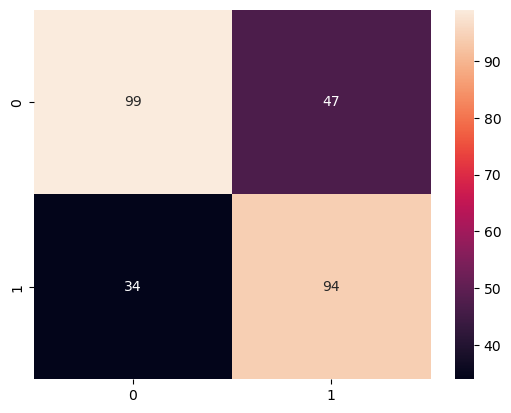

In [33]:
sns.heatmap(conf,annot=True)

In [34]:
clsrpt=classification_report(ytest,ypredt)

In [48]:
print(clsrpt)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       146
           1       0.67      0.73      0.70       128

    accuracy                           0.70       274
   macro avg       0.71      0.71      0.70       274
weighted avg       0.71      0.70      0.70       274



In [55]:
pres1=94/(94+47)
pres1

0.6666666666666666

In [57]:
pres0=99/(99+34)
pres0

0.7443609022556391

In [35]:
ypreddt_train=model.predict(xtrain)

In [36]:
conf_train=confusion_matrix(ytrain,ypreddt_train)

<Axes: >

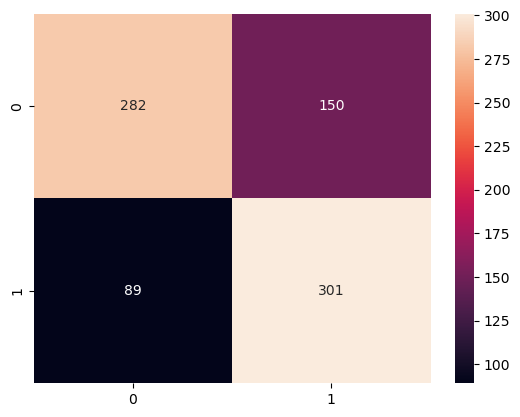

In [37]:
sns.heatmap(conf_train,annot=True,fmt="d")

In [38]:
print(classification_report(ytrain,ypreddt_train))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       432
           1       0.67      0.77      0.72       390

    accuracy                           0.71       822
   macro avg       0.71      0.71      0.71       822
weighted avg       0.72      0.71      0.71       822



In [39]:
ypreddt_train

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [40]:
roc_auc_score(ytrain,ypreddt_train)

0.7122863247863248

In [41]:
fpr,tpr,threshold=roc_curve(ytrain,ypreddt_train)

In [42]:
fpr

array([0.        , 0.34722222, 1.        ])

In [43]:
import matplotlib.pyplot as plt

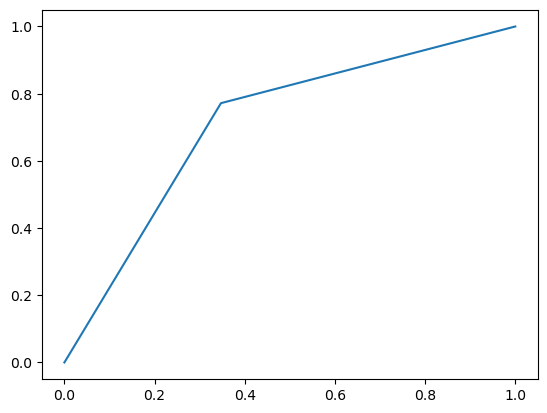

In [44]:
plt.plot(fpr,tpr)

In [45]:
fpr1,tpr1,threshold1=roc_curve(ytest,ypredt)

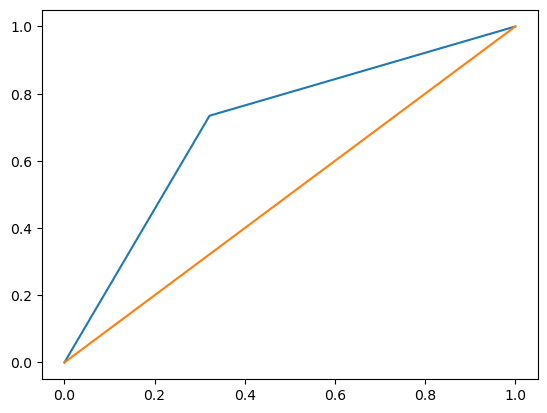

In [46]:
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1])